In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 

In [0]:
trdata= pd.read_csv("/content/gdrive/My Drive/ML/HW2/trainData.csv")
trlabel = pd.read_csv("/content/gdrive/My Drive/ML/HW2/trainLabels.csv")
valdata = pd.read_csv("/content/gdrive/My Drive/ML/HW2/valData.csv")
vallabel = pd.read_csv("/content/gdrive/My Drive/ML/HW2/valLabels.csv")
testlabel = pd.read_csv("/content/gdrive/My Drive/ML/HW2/testData_new.csv")
  

In [0]:
feature = pd.read_csv("/content/gdrive/My Drive/ML/HW2/features.csv")

In [103]:
trdata.shape

(4999, 3000)

In [0]:
testlabel.shape

(4748, 3001)

In [0]:
trdata = trdata.iloc[:,1:]
trlabel = trlabel.iloc[:,1:]
valdata = valdata.iloc[:,1:]
vallabel = vallabel.iloc[:,1:]
testlabel = testlabel.iloc[:,1:]
inputX = np.transpose(trdata.values) 
output = trlabel.values
wvalues_ridge = []


In [0]:
testlabel.shape

(4748, 3001)

In [0]:
def Ridge1(X,Y,Lambda):
  (k,N) = X.shape
  X2 = np.ones((1,N))
  Xbar = np.vstack((X,X2))
  Xbartran = np.transpose(Xbar)
  Product = Xbar.dot(Xbartran)
  Identity = np.identity(k)
  #print(Identity)
  X0 = np.zeros((k,1))
  X1 = np.zeros((1,k+1))
  IdenHor = np.hstack((Identity,X0))
  IdenVer = np.vstack((IdenHor, X1))
  Mul = np.dot(IdenVer,Lambda)
  Num = np.add(Mul,Product)
  Denom  = np.dot(Xbar,Y)    
  Inve = np.linalg.inv(Num)
  #print('Ridge')
  Final = np.dot(Inve,Denom)
  #print('\n')
  #print('The scalar b value')
  b = Final[-1]
  #print('\n')
  #print(b)
  Wval = Final[:-1]
  #print(Wval)
  wtran = np.transpose(Wval)
  sum1=0
  for i in range(0,N):
    o=X[...,i].ravel()
    otr= np.transpose(o)
    prod= 0
    prod = wtran.dot(otr)
    sum1 = sum1 + prod
  caly= sum1+b[0]
  pred = (caly - Y[i])**2
  WFinal = np.sum(np.array(Wval)**2)*Lambda
  obj = WFinal + pred
  Errori=[]
  for i in range(N):
    numerator=  np.transpose(Final).dot(Xbar[...,i].ravel()) - Y[i][0]
    sam= np.transpose(Xbar[...,i].ravel()).dot(Inve)
    sample = sam.dot(Xbar[...,i].ravel())
    denominator = 1 -sample
    Errori.append(numerator/denominator)
   
  return [Wval,b,obj,Errori]


In [126]:
r1=Ridge1(inputX,output,1)
Ridge_Model_Coefficient=r1[0]
Ridge_Model_bvalue=r1[1]
Ridge_Model_obj = r1[2]
Ridge_Model_Error = r1[3]
Ridge_Model_Coefficient


array([[ 0.05301218],
       [ 1.82304898],
       [ 0.7747221 ],
       ...,
       [-0.46607364],
       [-0.43807786],
       [ 0.30537536]])

In [127]:
Ridge_Model_bvalue

array([84.23997165])

In [128]:
Ridge_Model_obj

array([3.36786768e+08])

In [0]:
Ridge_Model_Error

In [130]:
GenerateVal=[]
for i in range(0,4748):
  PredictionVal=testlabel.values[i].dot(Ridge_Model_Coefficient)+ Ridge_Model_bvalue
  GenerateVal.append(PredictionVal[0])
GenerateVal

[86.83976463955463,
 87.61176707544531,
 85.9408713720411,
 89.54268873178775,
 88.81259697931812,
 88.85374982399297,
 87.33563034031191,
 86.67043199378048,
 80.47535295972924,
 87.49730457675618,
 86.94001712575187,
 88.96417590846043,
 88.69258269566109,
 86.88291208556743,
 88.77911861806018,
 89.43032269349467,
 83.87404684016744,
 92.03689755420167,
 87.35096134698821,
 84.14577792528112,
 89.04631544897198,
 90.51872587690582,
 83.19397317969859,
 86.56565328409496,
 86.4065248989635,
 88.64109355556866,
 88.14291822705454,
 90.10242559882528,
 88.81637765442488,
 89.98351072609333,
 87.73035729718647,
 87.56517200344065,
 87.05408123437587,
 84.27501107492091,
 89.99302717448063,
 89.39788933223153,
 84.03909193166675,
 87.9527184810194,
 90.1757526590852,
 88.1611662919309,
 89.11160925944786,
 89.75181910836619,
 84.0019172606303,
 90.0337848117252,
 87.0552684832808,
 86.05022308974107,
 86.77538937699417,
 85.523933505719,
 86.60639021957445,
 86.23667177671449,
 89.338641

In [0]:
mean1 = np.mean(GenerateVal)
mean1

87.96867267522782

In [0]:
len(GenerateVal)

In [0]:
RmsVal=[]
for i in range(0,4748):
  RmsVal.append((GenerateVal[i]-vallabel.values[i])**2)
  
rms_value=np.sqrt(np.mean(RmsVal))
rms_value

In [102]:
arrr = []
arrr1 = []
outer_arr = []
for i in [0.01, 0.1, 1, 10, 100, 1000]:
  r1=Ridge1(inputX,output,i)
  Ridge_Model_Coefficient=r1[0]
  Ridge_Model_bvalue=r1[1]
  Ridge_Model_obj = r1[2]
  Ridge_Model_Error = r1[3]
  Ridge_Model_Coefficient
  GenerateVal=[]
  for k in range(0,4999):
    PredictionVal=valdata.values[k].dot(Ridge_Model_Coefficient)+ Ridge_Model_bvalue
    GenerateVal.append(PredictionVal[0])
  RmsVal=[]
  for j in range(0,4999):
    RmsVal.append((GenerateVal[j]-vallabel.values[j])**2)
  arrr.append(np.sqrt(np.mean(RmsVal)))
  locerr = []
  for t in range(len(Ridge_Model_Error)):
    locerr.append((Ridge_Model_Error[t])**2)
  outer_arr.append(np.sqrt(np.mean(locerr)))
  Generate = []
  for k in range(0,4999):
    Prediction=trdata.values[k].dot(Ridge_Model_Coefficient)+ Ridge_Model_bvalue
    Generate.append(Prediction[0])
  Rms=[]
  for j in range(0,4999):
    Rms.append((Generate[j]-trlabel.values[j])**2)
  arrr1.append(np.sqrt(np.mean(Rms)))
    
arrr

  
  

[2.579568740442334,
 2.157730597910956,
 1.9969703773754823,
 2.3479077814790696,
 3.017446810325508,
 3.345765861996273]

In [89]:
r = np.square(arrr1)
sum1 = np.sum(r)
sum1


41.28036620008347

In [131]:
rmstrain = []
arrr1 = []
outer_arr = []
Generate=[]
sum11=0
for k in range(0,4999):
  Prediction=trdata.values[k].dot(Ridge_Model_Coefficient)+ Ridge_Model_bvalue
  Generate.append(Prediction[0])
Rms=[]
for j in range(0,4999):
  sum11=sum11+(Generate[j]-trlabel.values[j])**2
sum11


array([12450.96272903])

Text(0.5, 1.0, 'RMS Values Plot')

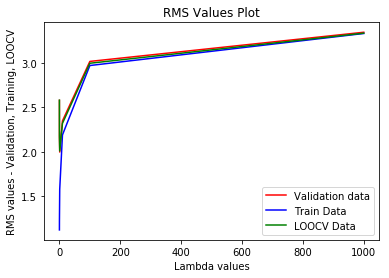

In [104]:
fig,graph=plt.subplots()
value = [0.01, 0.1, 1, 10, 100,1000]
graph.plot(value, arrr,'r', value, arrr1,'b', value, outer_arr,'g')
graph.set_xlabel("Lambda values")
graph.set_ylabel("RMS values - Validation, Training, LOOCV")
graph.legend(labels=['Validation data','Train Data','LOOCV Data'])
graph.set_title("RMS Values Plot")

In [0]:
fig, graph=plt.subplots()
graph.plot([0.01, 0.1, 1, 10, 100, 1000],arrr,'r')
graph.set_xlabel("Lambda")
graph.set_ylabel("RMS")
graph.set_title("Lambda vs RMS")

In [210]:

df = pd.DataFrame(y)  
# saving the dataframe 
df.to_csv('reg.csv', header=False, index=False) 
y.shape


(3000, 3002)

In [15]:
ze= feature.join(trlabel)
ze


,Names,0,85
0,flavors raspberries cherries,1,92
1,cherry cocoa,2,86
2,age years,3,87
3,different,4,88
4,marmalade,5,93
5,ready,6,90
6,darker,7,92
7,long spicy,8,87
8,grass,9,84
9,wine finishes,10,96


In [0]:
tu = tr.corr()
z = tu["85"]
absolu = abs(z)

In [254]:
sor = abs(z)
e = pd.DataFrame(sor)
e.shape
sor1 = e.sort_values(e.columns[0])
sor1

,85
0.0.1668,0.000002
0.0.1903,0.000015
0.0.1976,0.000022
0.0.852,0.000110
0.0.1234,0.000121
0.0.112,0.000123
0.0.2463,0.000129
0.0.2896,0.000129
0.0.2135,0.000164
0.0.2898,0.000174


In [0]:
value1 = pd.DataFrame(trdata.columns).join(feature)

In [0]:
value1.to_csv('ze.csv', header=False, index=False) 